<a href="https://colab.research.google.com/github/bhavinhirapara/Sentiment-Analysis/blob/main/IMDB_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Movie review sentiment analysis



**Import rquired library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
import re 
from nltk.corpus import stopwords
import nltk

Load Data and show first five data


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Perform EDA**

In [ ]:
data.shape

(50000, 2)

In [ ]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data.sentiment.unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
data.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


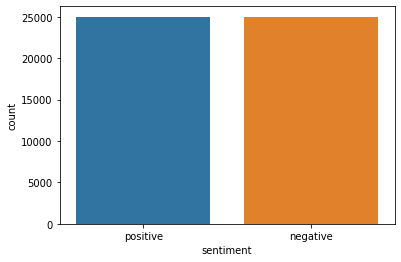

In [ ]:
sns.countplot(data.sentiment)

**Apply Label enconding to make target feature to numarical(Positive :1, Nagative :0 )**

In [ ]:
label = LabelEncoder()
data.sentiment = label.fit_transform(data.sentiment)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


**Divide data into independent and dependent** 

In [ ]:
x = data['review']
y = data['sentiment']

**Remove all the special and numaric character from data and and also remove stopword and apply stemming** 

In [ ]:
pstem = PorterStemmer()
corpus=[]
nltk.download("stopwords")
for i in range(len(x)):
  review = re.sub("[^a-zA-Z]"," ",x[i])
  review = review.lower()
  review  = review.split()
  review = [pstem.stem(word) for word in review if word not in set(stopwords.words("english"))]
  review = " ".join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Apply TfidfVectorizer to make taxt data into vector**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer(max_features=5000)
x = tfid.fit_transform(corpus).toarray()


In [ ]:
x.shape

(50000, 5000)

**Split data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40000, 5000), (10000, 5000), (40000,), (10000,))

**Define Naive-bayes model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Test Model using test data**

In [ ]:
y_pred = model.predict(x_test)

**Check accuracy_score, Confusion_matrix and classification_report**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_pred=y_pred,y_true=y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8518
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4959
           1       0.85      0.85      0.85      5041

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

[[4215  744]
 [ 738 4303]]


Differnce between Actual and Pridiction 

In [ ]:
pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
9995,1,1
9996,0,0
9997,0,0
9998,1,1


**Save my trained model and TfidfVectorizer**

In [ ]:
import pickle

In [ ]:
pickle.dump(tfid,open("Tfidf_vectorizer.pkl","wb"))
pickle.dump(model,open("Movie_review_classification.pkl","wb"))

**Load my naive_bayes model and TfidfVectorizer**

In [ ]:
save_tfid = pickle.load(open("Tfidf_vectorizer.pkl","rb"))
model1 = pickle.load(open("Movie_review_classification.pkl","rb"))

**Defind Method for pridiction**

In [ ]:
def Predict_Review(sentence):
  sen = save_tfid.transform([sentence]).toarray()
  res = model1.predict(sen)[0]
  if res ==1:
    return 'Positive Review'
  else:
    return 'Nagative Review'

In [ ]:
sen = "this is very bad movie of life"
res= Predict_Review(sen)
print(res)

Nagative Review
